<a href="https://colab.research.google.com/github/taylan-sen/CIS355_FALL05/blob/main/ML_neural_networks_for_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning - Computer Vision example
The notebook will go over:
* representing and displaying images
* example data from mnist
* ML to classify images

### How to represent images?

The good old Representation Problem is back, this time, with the broad question of:  

> ***How should we repesent images on a computer?***

In answering this question, a quote by the French novelist Asene Houssaye is relavant:  
>*Tell me whom you love and I will tell you who you are.*  
>  \- *Arsene Houssaye, French novelist*

The point being, in deciding an image representation format, it is relavant to first look at ourselves, that is the human visual system.   

<img src="https://www.thescottishsun.co.uk/wp-content/uploads/sites/2/2019/01/birdybox.jpg" width = 400>

The back of the eye, called the retina, is where light is focused by the eye lens. Along the retina are photoreceptor cells - which are effectively specialized neurons which eventually connect to the brain. The photoreceptor cells are arranged generally pseudo-hexagonally. Below is a cross section of the retina:  
<img src="https://www.cis.rit.edu/people/faculty/montag/vandplite/images/chapter_9/dist2.jpg" width=500>

<img src="https://my.clevelandclinic.org/-/scassets/images/org/health/articles/22694-retina" width=500>

There are two main classes of photoreceptors: rods (that are specialized for low light level black and white vision), and cones (which are specialized for color vision in bright conditions). Although we have over 20x more rod photoreceptors, they are mostly ***saturated*** during the day i.e. overstimulated to the point that they do not provide useful information.  

Most people have three types of cones: a red, green, and blue cone type, named for the frequency of light for which they are most sensitive to. Humans are able to perceive color by the differing levels of stimulation of the red, green, and blue cones. Note that a red cone photoreceptor is not limited to a single frequency of red light to be stimulated.  Rather, it is stimulated by almost all frequencies of light, but is just most sensitive at red. The blue and green cones similarly can be stimulated by light across the full visible spectrum.  

Nocturnal animals have a higher concentration of rods (some deep sea fishes are rod only), and some animals have more than three cone types (many birds also have an ultraviolet sensive cone type).  

![](https://i.sstatic.net/qJxws.png)

Now that we have some understanding of the human visual system, we can perhaps better address the representation problem. Since any frequency of light (there are infinite frequencies) results in stimulating red, green, and blue cones, it turns out we only need to measure store three numbers to capture typical human perception of color. When all three cone types fire 100%, we perceive it as white, just as all three cone types not firing at all give us the perception of black. As we might expect, equal levels of RGB stimulation at different levels gives rise to different shades of gray from black to white. The table below take note of the relative levels of red green and blue and the resulting colors (the max value is 255, the min value is 0, which is a result of using 8bits to represent each colors brightness).

![](https://excelatfinance.com/xlf/media/xlf-colindx2ws.png)

What does this all mean?  It shows that we can represent an image by how our photoreceptors would respond to it. Namely, we can divide an image up into a grid of picture elements, or pixels, with each pixel representing a red, blue, and green intensity. For black and white images, instead of a R,G, and B values, we can just have a single brightness number.  

#### numpy to the rescue

Out good ol' module for numeric python, numpy, has a special class for representing grids of numbers, the ndarray! We can use a 2d ndarray for black and white images (width vs. height), or a 3d ndarray for color images (the third dimension is for color, or more specifically, acts as an index 0,1,2 for R,G, and B values.)  The code below creates a white square within a black square. Try modifying the code to change the image.


In [1]:
import numpy as np
import matplotlib.pyplot as plt  # to display images
print('modules loaded')

modules loaded


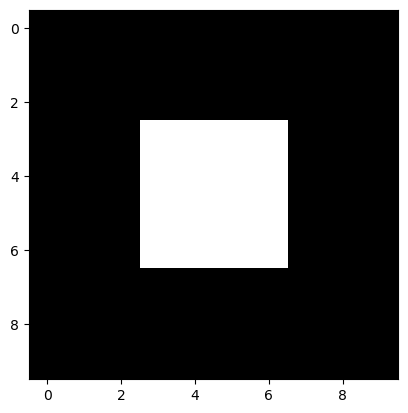

In [2]:
img = np.zeros((10,10), dtype=int)
img[3:7, 3:7] = 255
plt.imshow(img, cmap='gray')
plt.show()

QUESTION
1. Create a code cell below that creates a 20x20 pixel image with a white "plus" sign in the middle with a length and width of 7 pixels.

### The MNIST dataset

Zip codes written on mail at the **Buffalo, NY** postoffice was scanned to create a controlled dataset of actual in use handwritten digits. Since this initially created dataset, a more controlled process was used to create a bigger, higher resolution database of handwritten digits. This dataset has been used extensively in computer vision research. We can get it from the **keras** python module. Remember what keras was? 


In [5]:
# Here is how to load the mnist example data from Keras
# mnist is a popular dataset of hand-drawn digits obtained
# from the post office.

from keras.datasets import mnist # this is the source of the data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

QUESTIONS
1. In your own words, what is the keras module? (Be sure to explain how it is different/related to tensorflow.
2. How many training and test samples are there in the MNIST dataset in keras?
1. What are the input image dimensions?
1. What are the possible output values (aka image labels)?

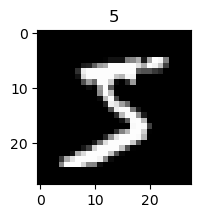

In [6]:
# Here is how to view the first image in the training set
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

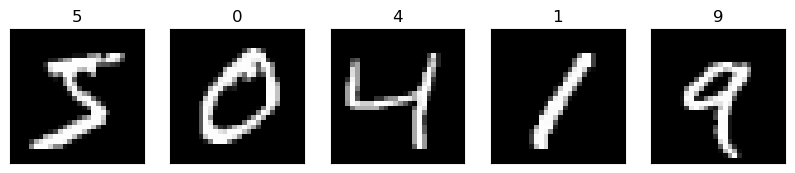

In [7]:
# Here are the first 5 training images
fig, axes = plt.subplots(ncols=5, sharex=False,
			 sharey=True, figsize=(10, 4))
for i in range(5):
	axes[i].set_title(y_train[i])
	axes[i].imshow(X_train[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()


### Image Brightness as a Feature

In supervised machine learning the inputs are also called ***features*** and the outputs are also called ***labels***.  In this section, instead of feeding every pixel value into a machine learning algorithm, we can process the data to put it into a format that, we hope, may be more useful to a machine learning algorithm to solve our problem. 

We can define image ***brightness*** as the sum of all the pixel values.  

***feature engineering*** - transforming or subselecting input variables from raw data to make it easier for a machine learning algorithm to succeed (training, accuracy, performance, etc.)


QUESTION
1. Explain why you think it may or may not be possible to discern between a 1 or a 0 based only upon the sum of the images pixel values (i.e. the overall brightness) of the image.

In [12]:
# In the code below, we calculate the brightness for all of
# the training samples.
brightness_train = X_train.sum(axis=(1,2))
print(type(brightness_train))
print(brightness_train.shape)
print(brightness_train[0:5])
print(y_train[0:5])


<class 'numpy.ndarray'>
(60000,)
[27525 31095 19443 17135 23214]
[5 0 4 1 9]


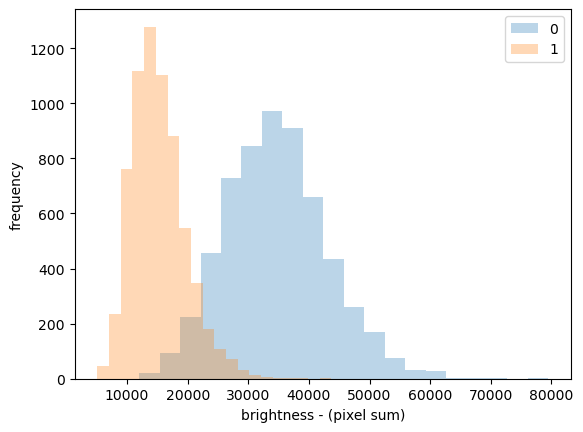

In [13]:
# The code below plots two histograms for the brightness
# values for 1's and 0's.
plt.hist(brightness_train[y_train==0], alpha=0.3, label=str(0), bins=20)
plt.hist(brightness_train[y_train==1], alpha=0.3, label=str(1), bins=20)
plt.legend()
plt.xlabel('brightness - (pixel sum)')
plt.ylabel('frequency')
plt.show()

QUESTIONS
1. If you were to classify between a 1 and 0 based solely on a brightness threshold, which value should you use for a threshold?
1. What does the size of the overlap of the orange and blue regions represent?

We can build a one dimensional decision tree classifier by specifying the threshold at which the input space is partitioned into 0's and 1's.

In [14]:
# build 1d decision tree classifier
def decision_tree_1d(input_ndarray, thresh):
  print('input shape', input_ndarray.shape)
  y_classification = (input_ndarray < thresh).astype(int)
  return y_classification

In [11]:
# test 1d decision tree classifier
brightness_test = X_test.sum(axis=(1,2))
classifier_result = decision_tree_1d(brightness_test, 9000)
# create index arrays
zero_images = y_test == 0
one_images  = y_test == 1
tot_images = zero_images | one_images # logical or
incorrect = classifier_result[tot_images] != y_test[tot_images]
print('# incorrect:', incorrect.sum())
print('% accuracy:', (tot_images.shape[0]-incorrect.sum())/tot_images.shape[0]*100)
print(classifier_result[zero_images][0:5])
print(classifier_result[one_images][0:5])
misclassified_zeros = classifier_result[zero_images] != y_test[zero_images]
print('# misclassified_zeros',misclassified_zeros.sum())

misclassified_ones = classifier_result[one_images] != y_test[one_images]
print('# misclassified_ones',misclassified_ones.sum())
print('confusion matrix:')
print('   \t0\t1')
s = '0:\t' + str(zero_images.sum() -misclassified_zeros.sum())
s += '\t' + str(misclassified_zeros.sum())
print(s)
s = '1:\t' + str(misclassified_ones.sum())
s += '\t' + str(one_images.sum() -misclassified_ones.sum())
print(s)


input shape (10000,)
# incorrect: 1087
% accuracy: 89.13
[0 0 0 0 0]
[0 0 0 0 0]
# misclassified_zeros 0
# misclassified_ones 1087
confusion matrix:
   	0	1
0:	980	0
1:	1087	48


QUESTION
1. Adjust the threshold in the code above to improve the accuracy - approximately which threshold gives the best overall accuracy? Observe how the confusion matrix changes.
1. Adjust the threshold to the maximum value which allows you to have zero instances of incorrecly classifying an acutal 0 as a 1.

### Average class representative
Another simple approach to classification problems is to find an "average" representative of each class. In other words, find what the average 0 looks like, the average 1 looks like, the average 2, etc. How close a new image is to each of the average classes. More specifically, we can caluclate the distance a sample is to each of the averaged class representatives are.  

In the code below, we take all the zero images, then take the mean over the sample # dimension. The result is the averaged 28x28 image.

zero_mean_img.shape (28, 28)


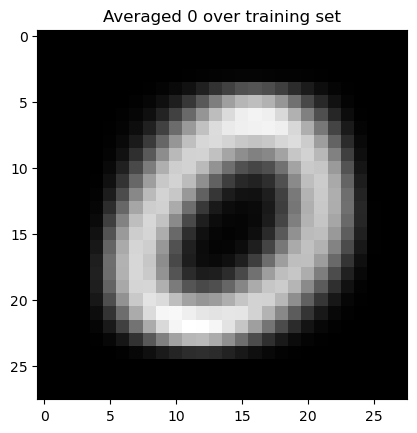

In [19]:
# Find average 0 image over all training samples
zero_images = y_train == 0
zero_mean_img = X_train[zero_images].mean(axis=0)
print('zero_mean_img.shape', zero_mean_img.shape)
plt.imshow(zero_mean_img, cmap='gray')
plt.title('Averaged 0 over training set')
plt.show()


zero_difference.shape (60000, 28, 28)
zero_distance.shape (60000,)


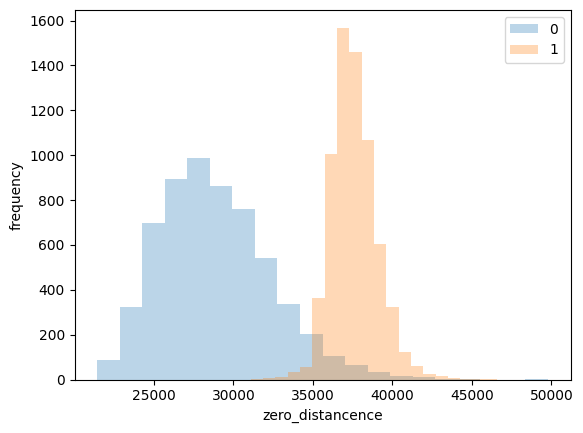

In [ ]:
zero_difference = np.abs(X_train - zero_mean_img)
zero_dist_train = zero_difference.sum(axis=(1,2))
print('zero_difference.shape', zero_difference.shape)
print('zero_distance.shape', zero_dist_train.shape)

plt.hist(zero_dist_train[y_train==0], alpha=0.3, label=str(0), bins=20)
plt.hist(zero_dist_train[y_train==1], alpha=0.3, label=str(1), bins=20)
plt.legend()
plt.xlabel('zero_distancence')
plt.ylabel('frequency')
plt.show()


### Questions

1. Create an average image for 1's (store it in a variable named: one_mean_image).
1. Create a variable, one_distance, which stores each image in the training set's distance from the mean image for 1.
1. Create a histogram with one_distance for actual 0's and 1's.
1. Modify the scatterplot below so that it uses one_distance as the x-axis variable instead of brightness_train

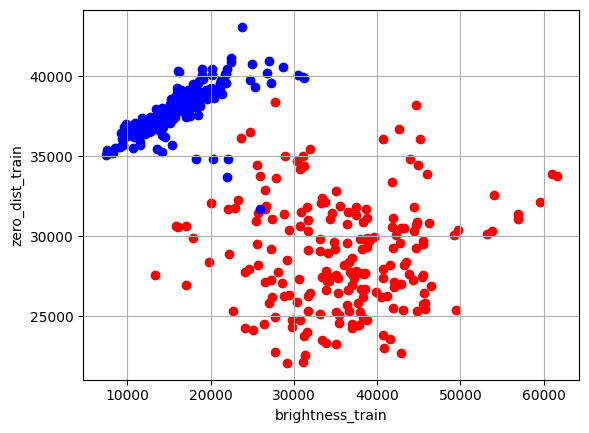

In [ ]:
plt.scatter(brightness_train[y_train == 0][0:200], zero_dist_train[y_train == 0][0:200],c='red')
plt.scatter(brightness_train[y_train == 1][0:200], zero_dist_train[y_train == 1][0:200],c='blue')
plt.xlabel('brightness_train')
plt.ylabel('zero_dist_train')
plt.grid(True)
plt.show()

Lets build a classifier that looks at both zero_distance and one_distance. Which one first? Can we, should we look at them at the same time?

In [17]:
# build 2d decision tree classifier
def decision_tree_2d(input0_ndarray, input1_ndarray):
  print('input0 shape', input0_ndarray.shape)
  print('input1 shape', input1_ndarray.shape)
  #y_classification = (input_ndarray < thresh).astype(int)
  y_classification = []
  for i in range(input0_ndarray.shape[0]):
    if input0_ndarray[i] < 22000:
      if input1_ndarray[i] < 33000:
        y = 0
      else:
        y = 1
    else:
      if input1_ndarray[i] < 39000:
        y = 0
      else:
        y = 1
    y_classification.append(y)

  return np.array(y_classification)

In [20]:
# test classifier
brightness_test = X_test.sum(axis=(1,2))
zero_difference = np.abs(X_test - zero_mean_img)
zero_dist_test = zero_difference.sum(axis=(1,2))

classifier_result = decision_tree_2d(brightness_test, zero_dist_test)
# create index arrays
zero_images = y_test == 0
one_images  = y_test == 1
tot_images = zero_images | one_images # logical or
incorrect = classifier_result[tot_images] != y_test[tot_images]
print(type(incorrect))
print('# incorrect:', incorrect.sum())
print('% accuracy:', (tot_images.shape[0]-incorrect.sum())/tot_images.shape[0]*100)
print(classifier_result[zero_images][0:5])
print(classifier_result[one_images][0:5])
misclassified_zeros = classifier_result[zero_images] != y_test[zero_images]
print('# misclassified_zeros',misclassified_zeros.sum())

misclassified_ones = classifier_result[one_images] != y_test[one_images]
print('# misclassified_ones',misclassified_ones.sum())
print('confusion matrix:')
print('   \t0\t1')
s = '0:\t' + str(zero_images.sum() -misclassified_zeros.sum())
s += '\t' + str(misclassified_zeros.sum())
print(s)
s = '1:\t' + str(misclassified_ones.sum())
s += '\t' + str(one_images.sum() -misclassified_ones.sum())
print(s)


input0 shape (10000,)
input1 shape (10000,)
<class 'numpy.ndarray'>
# incorrect: 18
% accuracy: 99.82
[0 0 0 0 0]
[1 1 1 1 1]
# misclassified_zeros 5
# misclassified_ones 13
confusion matrix:
   	0	1
0:	975	5
1:	13	1122


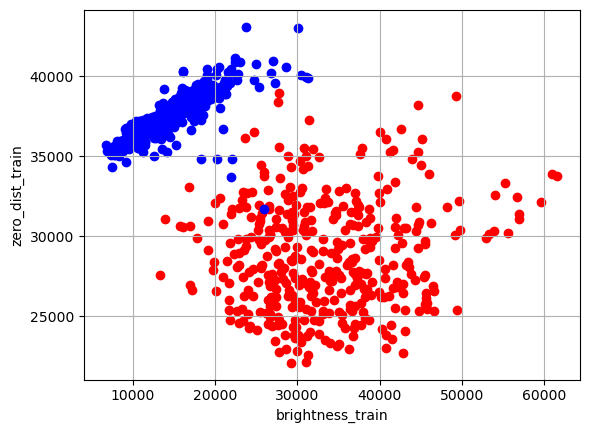

In [24]:
plt.scatter(brightness_test[y_test == 0][0:200], zero_dist_test[y_test == 0][0:200],c='red')
plt.scatter(brightness_test[y_test == 1][0:200], zero_dist_test[y_test == 1][0:200],c='blue')
plt.scatter(brightness_train[y_train == 0][0:200], zero_dist_train[y_train == 0][0:200],c='red')
plt.scatter(brightness_train[y_train == 1][0:200], zero_dist_train[y_train == 1][0:200],c='blue')
plt.xlabel('brightness_train')
plt.ylabel('zero_dist_train')
plt.grid(True)
plt.show()

In [15]:
# Nearest neighbor

def nearest_neighbor(input0_train, input1_train, input0_test, input1_test):
  # cycle through every point in the test set
  y_classification = []
  zero_images = y_train == 0
  one_images  = y_train == 1
  tot_images = zero_images | one_images # logical or

  for i in range(input0_test.shape[0]):
    delta0_train = input0_train[tot_images] - input0_test[i]
    delta1_train = input1_train[tot_images] - input1_test[i]
    dist_train = np.square(delta0_train) + np.square(delta1_train)
    closest_point = np.argmin(dist_train)
    y_classification.append(y_train[tot_images][closest_point])

  return np.array(y_classification)

In [21]:
# test nearest neighbor classifier
brightness_test = X_test.sum(axis=(1,2))
zero_difference = np.abs(X_test - zero_mean_img)
zero_dist_test = zero_difference.sum(axis=(1,2))

brightness_train = X_train.sum(axis=(1,2))
zero_difference = np.abs(X_train - zero_mean_img)
zero_dist_train = zero_difference.sum(axis=(1,2))

classifier_result = nearest_neighbor(brightness_train, zero_dist_train,
                                     brightness_test, zero_dist_test)
# create index arrays
zero_images = y_test == 0
one_images  = y_test == 1
tot_images = zero_images | one_images # logical or
incorrect = classifier_result[tot_images] != y_test[tot_images]
print(type(incorrect))
print('# incorrect:', incorrect.sum())
print('% accuracy:', (tot_images.shape[0]-incorrect.sum())/tot_images.shape[0]*100)
print(classifier_result[zero_images][0:5])
print(classifier_result[one_images][0:5])
misclassified_zeros = classifier_result[zero_images] != y_test[zero_images]
print('# misclassified_zeros',misclassified_zeros.sum())

misclassified_ones = classifier_result[one_images] != y_test[one_images]
print('# misclassified_ones',misclassified_ones.sum())
print('confusion matrix:')
print('   \t0\t1')
s = '0:\t' + str(zero_images.sum() -misclassified_zeros.sum())
s += '\t' + str(misclassified_zeros.sum())
print(s)
s = '1:\t' + str(misclassified_ones.sum())
s += '\t' + str(one_images.sum() -misclassified_ones.sum())
print(s)


<class 'numpy.ndarray'>
# incorrect: 18
% accuracy: 99.82
[0 0 0 0 0]
[1 1 1 1 1]
# misclassified_zeros 11
# misclassified_ones 7
confusion matrix:
   	0	1
0:	969	11
1:	7	1128


## Linear Classifier

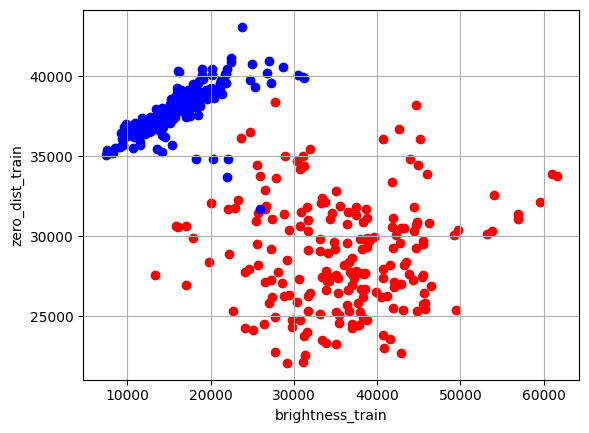

In [ ]:
# linear classifier
plt.scatter(brightness_train[y_train == 0][0:200], zero_dist_train[y_train == 0][0:200],c='red')
plt.scatter(brightness_train[y_train == 1][0:200], zero_dist_train[y_train == 1][0:200],c='blue')
plt.xlabel('brightness_train')
plt.ylabel('zero_dist_train')
plt.grid(True)
plt.show()

From this plot, we can estimate that the y-intercept (zero_dist intercept, or "b") is 24000.
We can also estimate a slope of 45 degrees which is 5000/10000 = 0.5 (m = 0.5)
Thus, our line threshold equation becomes
y = mx + b
y = (0.5)x + 27000
zero_dist = (0.5) * (brightness) + 24000

and rearranging:

0 = (0.5) * brightness - zero_dist + 24000

This gives values right on the line.

If the value on the right is positive, we can classify as zero and one otherwise. Lets see what this decision surface looks like.

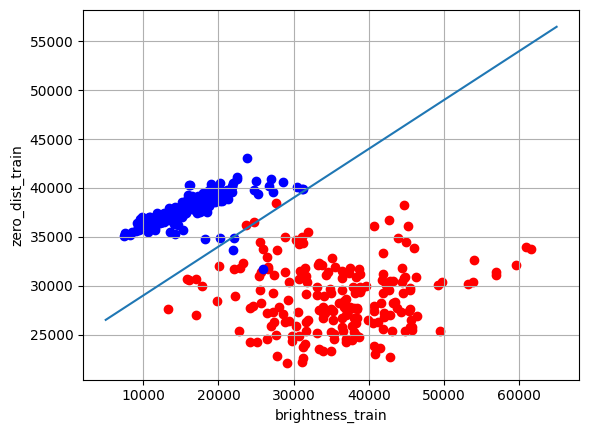

In [ ]:
plt.scatter(brightness_train[y_train == 0][0:200], zero_dist_train[y_train == 0][0:200],c='red')
plt.scatter(brightness_train[y_train == 1][0:200], zero_dist_train[y_train == 1][0:200],c='blue')
x_values = np.linspace(5000, 65000,200)
y_values = 0.5* x_values +24000
plt.plot(x_values, y_values)
plt.xlabel('brightness_train')
plt.ylabel('zero_dist_train')
plt.grid(True)
plt.show()

In [ ]:
# build a linear classifier
def linear_classifier(input0_ndarray, input1_ndarray):
  y_classification = (0.5*input0_ndarray - input1_ndarray + 24000).astype(int) < 0

  return y_classification

In [ ]:
# test classifier
brightness_test = X_test.sum(axis=(1,2))
zero_difference = np.abs(X_test - zero_mean_img)
zero_dist_test = zero_difference.sum(axis=(1,2))

classifier_result = linear_classifier(brightness_test, zero_dist_test)
# create index arrays
zero_images = y_test == 0
one_images  = y_test == 1
tot_images = zero_images | one_images # logical or
incorrect = classifier_result[tot_images] != y_test[tot_images]
print(type(incorrect))
print('# incorrect:', incorrect.sum())
print('% accuracy:', (tot_images.shape[0]-incorrect.sum())/tot_images.shape[0]*100)
print(classifier_result[zero_images][0:5])
print(classifier_result[one_images][0:5])
misclassified_zeros = classifier_result[zero_images] != y_test[zero_images]
print('# misclassified_zeros',misclassified_zeros.sum())

misclassified_ones = classifier_result[one_images] != y_test[one_images]
print('# misclassified_ones',misclassified_ones.sum())
print('confusion matrix:')
print('   \t0\t1')
s = '0:\t' + str(zero_images.sum() -misclassified_zeros.sum())
s += '\t' + str(misclassified_zeros.sum())
print(s)
s = '1:\t' + str(misclassified_ones.sum())
s += '\t' + str(one_images.sum() -misclassified_ones.sum())
print(s)


<class 'numpy.ndarray'>
# incorrect: 13
% accuracy: 99.87
[False False False False False]
[ True  True  True  True  True]
# misclassified_zeros 6
# misclassified_ones 7
confusion matrix:
   	0	1
0:	974	6
1:	7	1128
